# Demonstration of Numba

This notebook gives a simple demonstration of JIT compilation in Python using [Numba](http://numba.pydata.org/).

Prepared for the Chicago Fed workshop on Scientific Computing with Python and Julia.

Our aim is to generate and plot the sequence

$$ x_{t+1} = 4 x_t (1 - x_t), \quad x_0 \text{ given} $$

First some set up steps:

In [28]:
%matplotlib inline

In [29]:
import matplotlib.pyplot as plt
import numpy as np

Now we define a function to generate this time series.

In [30]:
def qm(x0, n):
    x = np.empty(n+1)
    x[0] = x0
    for t in range(n):
        x[t+1] = 4 * x[t] * (1 - x[t])
    return x

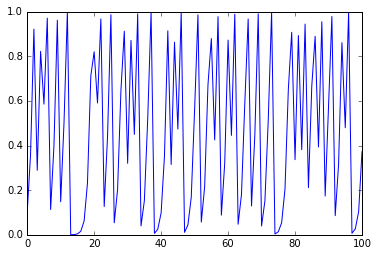

In [31]:
plt.plot(qm(0.1, 100))

In [32]:
n = 10**7

In [33]:
%timeit qm(0.1, n)

1 loop, best of 3: 6.46 s per loop


In [34]:
from numba import jit

In [35]:
qm_jit = jit(qm)

In [36]:
%timeit qm_jit(0.1, n)

10 loops, best of 3: 34.9 ms per loop


On my computer the speed up factor is around 200 times.

More information on Numba can be found [in this lecture](http://quant-econ.net/py/need_for_speed.html).